<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Credit_Information_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding the content of the competition**

Home Credit Default Risk Competition Overview
The Home Credit Default Risk competition on Kaggle is a supervised machine learning task focused on credit risk assessment. The objective is to use historical data from Home Credit to build a model that predicts whether a loan applicant will be able to repay their loan or will default.

What is Home Credit?
Home Credit B.V. is an international non-bank financial institution founded in the Czech Republic. It specializes in installment lending, primarily serving people with little or no credit history in emerging markets. The company's mission is to provide accessible financial services to the "underbanked" population who may be denied credit by traditional banks due to a lack of a formal credit record.

What is Expected in this Competition?
The goal is to classify loan applicants into one of two categories:
1. TARGET = O: The loan was repaid on time.
2. TARGET = 1: The client had difficulty repaying the loan and defaulted.

Participants are provided with a large and complex dataset containing information on loan applications, previous credits from other financial institutions, payment histories, and more. The challenge lies in using this data to create a robust predictive model that can accurately predict the TARGET variable for new applicants.

Benefits for Home Credit
By accurately predicting loan default risk, Home Credit can gain significant advantages:
1. Minimize financial risk by identifying low-risk clients

2. Avoid rejecting creditworthy applicants who lack traditional credit history

3. Tailor loan terms (amount, duration, repayment schedule) to match client profiles

4. Expand access to safe and fair lending for the unbanked population

5. Improve customer experience and reduce losses from defaults

**Understanding the Overview of data**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


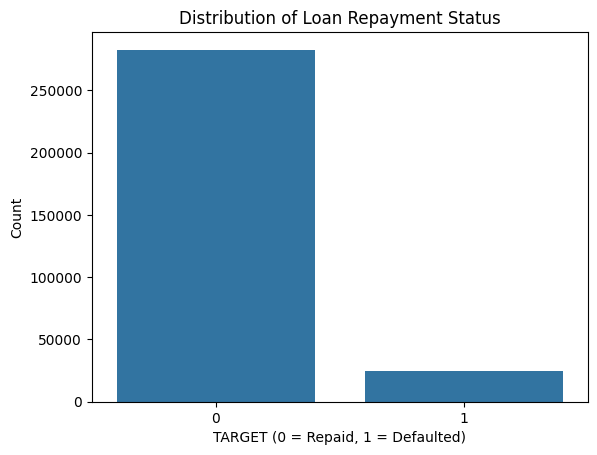

In [1]:
import pandas as pd

# Load the training data
df = pd.read_csv('application_train.csv')

# Preview the first few rows
df.head()

df.info()
df.describe().T

# Checking missing values
missing = df.isnull().sum()
missing_ratio = (missing / len(df)).sort_values(ascending=False)

missing_summary = pd.DataFrame({
    'Missing Count': missing,
    'Missing Ratio': missing_ratio
})
missing_summary[missing_summary['Missing Count'] > 0]

import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='TARGET', data=df)
plt.title("Distribution of Loan Repayment Status")
plt.xlabel("TARGET (0 = Repaid, 1 = Defaulted)")
plt.ylabel("Count")
plt.show()

**Defining Issues**

1. Which features most strongly influence loan default risk?
***Can we identify key predictors of TARGET using correlation, feature importance, or model-based analysis?

***Are income, employment status, or credit history more predictive?

2. How does income level relate to default risk?
***Do applicants with lower AMT_INCOME_TOTAL have higher default rates?

***Is there a threshold below which risk increases significantly?

3. Does age affect repayment behavior?
***Using DAYS_BIRTH, can we find patterns between age and default?

***Are younger or older applicants more likely to default?

4. Do employment duration and job type matter?
***Is there a relationship between DAYS_EMPLOYED and TARGET?

***Do certain NAME_INCOME_TYPE or NAME_OCCUPATION_TYPE categories show higher risk?

5. How does housing status affect credit risk?
***Does owning a house (FLAG_OWN_REALTY) or car (FLAG_OWN_CAR) reduce default likelihood?

***Are renters more likely to default?

6. Are there data quality issues that could affect model accuracy?
***Which features have high missing values?

***Should we drop or impute them?

***Are there outliers or inconsistent values (e.g., DAYS_EMPLOYED = 365243)?

7. How imbalanced is the target variable, and how should we handle it?
***Should we use resampling techniques like SMOTE or undersampling?

***Would adjusting class weights improve model performance?

8. Can we engineer new features to improve prediction?
***Can we create ratios (e.g., income-to-loan amount)?

***Can we group categorical variables more meaningfully?

9. Which machine learning models perform best on this data?
***Should we use logistic regression, random forest, gradient boosting, or neural networks?

***How do they compare in terms of ROC AUC?

10. How well does our model generalize to unseen data?
***Are we overfitting due to too many features?

***Should we use cross-validation or regularization?

**Data Exploration**

/tmp/ipython-input-3367473684.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


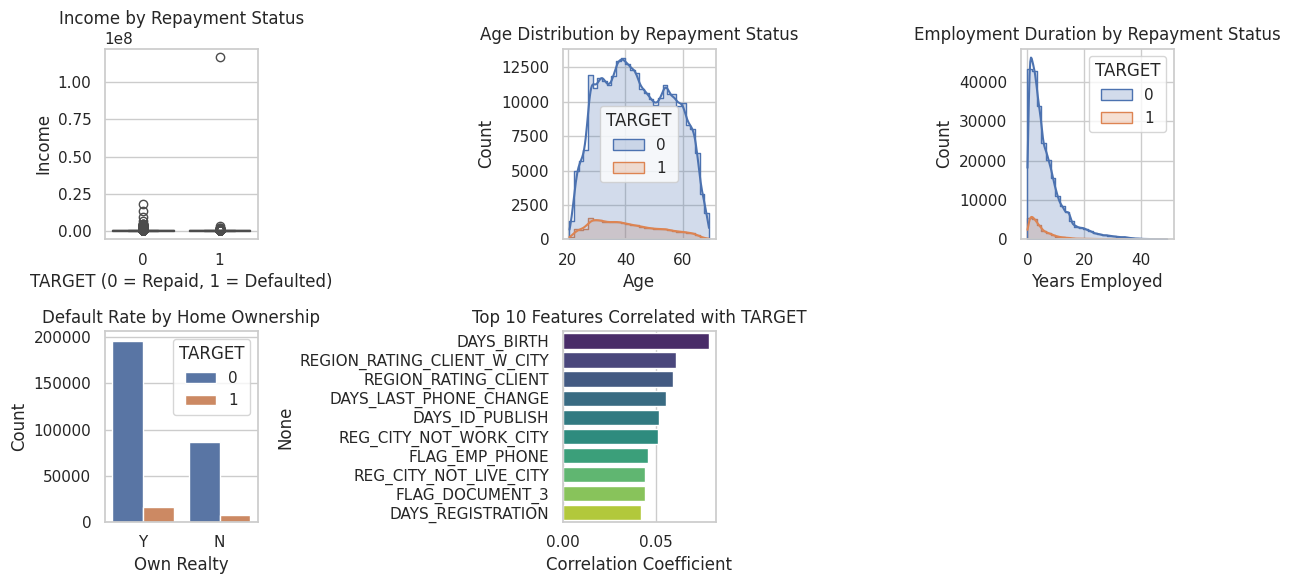

🔍 Top 10 Features Most Correlated with TARGET:
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('application_train.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Income vs Default Rate
plt.subplot(2, 3, 1)
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.title('Income by Repayment Status')
plt.xlabel('TARGET (0 = Repaid, 1 = Defaulted)')
plt.ylabel('Income')

# 2. Age vs Default Rate
df['AGE'] = -df['DAYS_BIRTH'] / 365
plt.subplot(2, 3, 2)
sns.histplot(data=df, x='AGE', hue='TARGET', bins=30, kde=True, element='step')
plt.title('Age Distribution by Repayment Status')
plt.xlabel('Age')

# 3. Employment Duration vs Default Rate
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, pd.NA) / -365
plt.subplot(2, 3, 3)
sns.histplot(data=df.dropna(subset=['YEARS_EMPLOYED']), x='YEARS_EMPLOYED', hue='TARGET', bins=30, kde=True, element='step')
plt.title('Employment Duration by Repayment Status')
plt.xlabel('Years Employed')

# 4. Housing Status vs Default Rate
plt.subplot(2, 3, 4)
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=df)
plt.title('Default Rate by Home Ownership')
plt.xlabel('Own Realty')
plt.ylabel('Count')

# 5. Feature Correlation with TARGET
plt.subplot(2, 3, 5)
correlations = df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
top_features = correlations[1:11]  # Exclude TARGET itself
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Features Correlated with TARGET')
plt.xlabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

# Print top correlated features
print("🔍 Top 10 Features Most Correlated with TARGET:")
print(top_features)